In [72]:
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow import keras

In [84]:
df=pd.read_csv('train.csv')

In [85]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [87]:
df['Title']=df['Name'].str.extract(' ([A-Za-z]+)\.',expand=True)

In [90]:
df['Title'].value_counts()

Mr        538
Miss      185
Mrs       128
Master     40
Name: Title, dtype: int64

In [89]:
df['Title']=df['Title'].replace(['Ms','Mlle'],'Miss')
df['Title']=df['Title'].replace(['Mme','Countess','Lady','Dona'],'Mrs')
df['Title']=df['Title'].replace(['Rev','Jonkheer','Don','Sir','Major','Dr','Capt','Col'],'Mr')

In [91]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [102]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
Title       0
Family      0
dtype: int64

In [93]:
df[df['Age']<18] #18 yaşından büyük olanları getir

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,Miss
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S,Miss
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q,Master
...,...,...,...,...,...,...,...,...,...,...,...,...,...
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.2750,NaN,S,Master
852,853,0,3,"Boulos, Miss. Nourelain",female,9.0,1,1,2678,15.2458,NaN,C,Miss
853,854,1,1,"Lines, Miss. Mary Conover",female,16.0,0,1,PC 17592,39.4000,D28,S,Miss
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,347742,11.1333,NaN,S,Master


In [94]:
df.groupby('Sex')['Age'].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [95]:
df['Age']=df['Age'].fillna(df.groupby('Title')['Age'].transform('median'))#Boş veri doldurma

In [96]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

In [97]:
df['Family']=df['SibSp']+df['Parch']+1

In [99]:
del df['Name']
del df['PassengerId']
del df['Ticket']

In [101]:
del df['Cabin']

In [105]:
df.head(1)

,Survived,Pclass,Age,SibSp,Parch,Fare,Family,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs
0,0,3,22.0,1,0,7.25,2,1,0,1,0,1,0


In [104]:
df=pd.get_dummies(df,drop_first=True)

In [106]:
x=df.drop('Survived',axis=1)
y=df[['Survived']]

In [116]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [108]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [149]:
model=Sequential()
model.add(Dense(8,activation='relu')) 
model.add(Dense(120,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(2,activation='relu'))
model.add(Dense(1,activation='sigmoid')) 
model.compile(loss='binary_crossentropy',optimizer='adam',metrics='accuracy')

model = Sequential()
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics='accuracy')

In [151]:
history = model.fit(x,y,epochs=1000,batch_size=32,validation_split=.20,verbose=1)

Epoch 1/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.4825 - accuracy: 0.7725 - val_loss: 0.3859 - val_accuracy: 0.8492
Epoch 2/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.4653 - accuracy: 0.7949 - val_loss: 0.3858 - val_accuracy: 0.8492
Epoch 3/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.4669 - accuracy: 0.7935 - val_loss: 0.4132 - val_accuracy: 0.8324
Epoch 4/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.4610 - accuracy: 0.8020 - val_loss: 0.3796 - val_accuracy: 0.8603
Epoch 5/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.4732 - accuracy: 0.7949 - val_loss: 0.3803 - val_accuracy: 0.8659
Epoch 6/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.4666 - accuracy: 0.7978 - val_loss: 0.3832 - val_accuracy: 0.8436
Epoch 7/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.4766 - accuracy: 0.7893 - val_loss: 0.3819 - val_accuracy: 0.8603
Epoch 

23/23 [==============================] - 0s 3ms/step - loss: 0.4414 - accuracy: 0.8188 - val_loss: 0.3814 - val_accuracy: 0.8436
Epoch 59/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.4479 - accuracy: 0.8104 - val_loss: 0.3785 - val_accuracy: 0.8436
Epoch 60/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.4422 - accuracy: 0.8118 - val_loss: 0.3771 - val_accuracy: 0.8547
Epoch 61/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.4478 - accuracy: 0.8090 - val_loss: 0.3588 - val_accuracy: 0.8659
Epoch 62/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.4487 - accuracy: 0.8160 - val_loss: 0.3700 - val_accuracy: 0.8715
Epoch 63/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.4305 - accuracy: 0.8272 - val_loss: 0.3968 - val_accuracy: 0.8324
Epoch 64/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.4534 - accuracy: 0.8104 - val_loss: 0.3895 - val_accuracy: 0.8380
Epoch 65/1000

23/23 [==============================] - 0s 3ms/step - loss: 0.4090 - accuracy: 0.8315 - val_loss: 0.3625 - val_accuracy: 0.8380
Epoch 116/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.4494 - accuracy: 0.8034 - val_loss: 0.4041 - val_accuracy: 0.8324
Epoch 117/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.4532 - accuracy: 0.8034 - val_loss: 0.3612 - val_accuracy: 0.8715
Epoch 118/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.4227 - accuracy: 0.8202 - val_loss: 0.3542 - val_accuracy: 0.8715
Epoch 119/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.4418 - accuracy: 0.8048 - val_loss: 0.4277 - val_accuracy: 0.8268
Epoch 120/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.4594 - accuracy: 0.8006 - val_loss: 0.3608 - val_accuracy: 0.8603
Epoch 121/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.4265 - accuracy: 0.8202 - val_loss: 0.3589 - val_accuracy: 0.8492
Epoch 1

Epoch 172/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.3866 - accuracy: 0.8315 - val_loss: 0.3822 - val_accuracy: 0.8380
Epoch 173/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.3943 - accuracy: 0.8132 - val_loss: 0.3576 - val_accuracy: 0.8380
Epoch 174/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.3879 - accuracy: 0.8272 - val_loss: 0.3613 - val_accuracy: 0.8771
Epoch 175/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.3913 - accuracy: 0.8258 - val_loss: 0.3604 - val_accuracy: 0.8547
Epoch 176/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.3890 - accuracy: 0.8329 - val_loss: 0.3536 - val_accuracy: 0.8436
Epoch 177/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.3905 - accuracy: 0.8357 - val_loss: 0.3620 - val_accuracy: 0.8603
Epoch 178/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.3858 - accuracy: 0.8258 - val_loss: 0.3652 - val_accuracy:

Epoch 229/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.3798 - accuracy: 0.8272 - val_loss: 0.4120 - val_accuracy: 0.8268
Epoch 230/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.3700 - accuracy: 0.8244 - val_loss: 0.3798 - val_accuracy: 0.8268
Epoch 231/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.3863 - accuracy: 0.8216 - val_loss: 0.3852 - val_accuracy: 0.8547
Epoch 232/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.3701 - accuracy: 0.8301 - val_loss: 0.3779 - val_accuracy: 0.8492
Epoch 233/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.3708 - accuracy: 0.8399 - val_loss: 0.3792 - val_accuracy: 0.8547
Epoch 234/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.3649 - accuracy: 0.8371 - val_loss: 0.3828 - val_accuracy: 0.8547
Epoch 235/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.3690 - accuracy: 0.8357 - val_loss: 0.4080 - val_accuracy:

Epoch 286/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.3721 - accuracy: 0.8413 - val_loss: 0.3994 - val_accuracy: 0.8380
Epoch 287/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.3903 - accuracy: 0.8413 - val_loss: 0.4181 - val_accuracy: 0.8547
Epoch 288/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.3736 - accuracy: 0.8385 - val_loss: 0.3873 - val_accuracy: 0.8547
Epoch 289/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.3533 - accuracy: 0.8441 - val_loss: 0.3998 - val_accuracy: 0.8268
Epoch 290/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.3551 - accuracy: 0.8455 - val_loss: 0.4065 - val_accuracy: 0.8324
Epoch 291/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.3457 - accuracy: 0.8483 - val_loss: 0.4114 - val_accuracy: 0.8492
Epoch 292/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.3449 - accuracy: 0.8413 - val_loss: 0.3956 - val_accuracy:

Epoch 343/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.3356 - accuracy: 0.8497 - val_loss: 0.4361 - val_accuracy: 0.8436
Epoch 344/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.3460 - accuracy: 0.8399 - val_loss: 0.4796 - val_accuracy: 0.8101
Epoch 345/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.3648 - accuracy: 0.8427 - val_loss: 0.4204 - val_accuracy: 0.8436
Epoch 346/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.3514 - accuracy: 0.8469 - val_loss: 0.4260 - val_accuracy: 0.8380
Epoch 347/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.3609 - accuracy: 0.8315 - val_loss: 0.4351 - val_accuracy: 0.8268
Epoch 348/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.3421 - accuracy: 0.8511 - val_loss: 0.4295 - val_accuracy: 0.8324
Epoch 349/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.3396 - accuracy: 0.8441 - val_loss: 0.4360 - val_accuracy:

Epoch 400/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.3435 - accuracy: 0.8469 - val_loss: 0.4549 - val_accuracy: 0.8324
Epoch 401/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.3289 - accuracy: 0.8525 - val_loss: 0.4551 - val_accuracy: 0.8380
Epoch 402/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.3844 - accuracy: 0.8371 - val_loss: 0.4373 - val_accuracy: 0.8436
Epoch 403/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.3711 - accuracy: 0.8287 - val_loss: 0.4335 - val_accuracy: 0.8436
Epoch 404/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.3396 - accuracy: 0.8483 - val_loss: 0.4285 - val_accuracy: 0.8603
Epoch 405/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.3321 - accuracy: 0.8455 - val_loss: 0.4639 - val_accuracy: 0.8324
Epoch 406/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.3376 - accuracy: 0.8525 - val_loss: 0.4322 - val_accuracy:

Epoch 457/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.3570 - accuracy: 0.8469 - val_loss: 0.4464 - val_accuracy: 0.8156
Epoch 458/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.4306 - accuracy: 0.8301 - val_loss: 0.4369 - val_accuracy: 0.8324
Epoch 459/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.3621 - accuracy: 0.8357 - val_loss: 0.4526 - val_accuracy: 0.8268
Epoch 460/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.3460 - accuracy: 0.8427 - val_loss: 0.4616 - val_accuracy: 0.8268
Epoch 461/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.3339 - accuracy: 0.8525 - val_loss: 0.4835 - val_accuracy: 0.8268
Epoch 462/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.3248 - accuracy: 0.8567 - val_loss: 0.4814 - val_accuracy: 0.8268
Epoch 463/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.3198 - accuracy: 0.8624 - val_loss: 0.4792 - val_accuracy:

Epoch 514/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.3520 - accuracy: 0.8343 - val_loss: 0.4812 - val_accuracy: 0.8324
Epoch 515/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.3260 - accuracy: 0.8624 - val_loss: 0.5150 - val_accuracy: 0.8380
Epoch 516/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.3096 - accuracy: 0.8567 - val_loss: 0.4788 - val_accuracy: 0.8268
Epoch 517/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.3027 - accuracy: 0.8694 - val_loss: 0.5323 - val_accuracy: 0.8268
Epoch 518/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.3027 - accuracy: 0.8596 - val_loss: 0.4916 - val_accuracy: 0.8212
Epoch 519/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.3117 - accuracy: 0.8610 - val_loss: 0.4987 - val_accuracy: 0.8380
Epoch 520/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.3028 - accuracy: 0.8638 - val_loss: 0.4962 - val_accuracy:

Epoch 571/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.3083 - accuracy: 0.8666 - val_loss: 0.5219 - val_accuracy: 0.8156
Epoch 572/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.3225 - accuracy: 0.8567 - val_loss: 0.5562 - val_accuracy: 0.8212
Epoch 573/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.3026 - accuracy: 0.8694 - val_loss: 0.5775 - val_accuracy: 0.8268
Epoch 574/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.2970 - accuracy: 0.8624 - val_loss: 0.5433 - val_accuracy: 0.8156
Epoch 575/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.2927 - accuracy: 0.8722 - val_loss: 0.5381 - val_accuracy: 0.8324
Epoch 576/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.2886 - accuracy: 0.8708 - val_loss: 0.5914 - val_accuracy: 0.8212
Epoch 577/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.2904 - accuracy: 0.8736 - val_loss: 0.5497 - val_accuracy:

Epoch 628/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.3152 - accuracy: 0.8708 - val_loss: 0.4370 - val_accuracy: 0.8324
Epoch 629/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.2951 - accuracy: 0.8722 - val_loss: 0.4676 - val_accuracy: 0.8156
Epoch 630/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.2917 - accuracy: 0.8792 - val_loss: 0.4500 - val_accuracy: 0.8212
Epoch 631/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.2916 - accuracy: 0.8750 - val_loss: 0.4431 - val_accuracy: 0.8324
Epoch 632/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.2955 - accuracy: 0.8708 - val_loss: 0.4643 - val_accuracy: 0.8212
Epoch 633/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.2918 - accuracy: 0.8778 - val_loss: 0.4476 - val_accuracy: 0.8268
Epoch 634/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.2935 - accuracy: 0.8792 - val_loss: 0.4734 - val_accuracy:

Epoch 685/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.3040 - accuracy: 0.8638 - val_loss: 0.4506 - val_accuracy: 0.8268
Epoch 686/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.3051 - accuracy: 0.8708 - val_loss: 0.4370 - val_accuracy: 0.8268
Epoch 687/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.3317 - accuracy: 0.8427 - val_loss: 0.4234 - val_accuracy: 0.8212
Epoch 688/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.3012 - accuracy: 0.8680 - val_loss: 0.4511 - val_accuracy: 0.8380
Epoch 689/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.3073 - accuracy: 0.8666 - val_loss: 0.4384 - val_accuracy: 0.8212
Epoch 690/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.3073 - accuracy: 0.8694 - val_loss: 0.4283 - val_accuracy: 0.8436
Epoch 691/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.2819 - accuracy: 0.8820 - val_loss: 0.4600 - val_accuracy:

Epoch 742/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.2774 - accuracy: 0.8862 - val_loss: 0.5501 - val_accuracy: 0.8212
Epoch 743/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.2836 - accuracy: 0.8806 - val_loss: 0.5735 - val_accuracy: 0.8156
Epoch 744/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.2715 - accuracy: 0.8820 - val_loss: 0.5881 - val_accuracy: 0.8380
Epoch 745/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.2697 - accuracy: 0.8876 - val_loss: 0.5443 - val_accuracy: 0.8268
Epoch 746/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.2736 - accuracy: 0.8848 - val_loss: 0.5870 - val_accuracy: 0.8380
Epoch 747/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.2831 - accuracy: 0.8722 - val_loss: 0.5923 - val_accuracy: 0.8156
Epoch 748/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.3011 - accuracy: 0.8680 - val_loss: 0.6403 - val_accuracy:

Epoch 799/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.2765 - accuracy: 0.8834 - val_loss: 0.5768 - val_accuracy: 0.8212
Epoch 800/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.2766 - accuracy: 0.8792 - val_loss: 0.5569 - val_accuracy: 0.8101
Epoch 801/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.2781 - accuracy: 0.8736 - val_loss: 0.5609 - val_accuracy: 0.8268
Epoch 802/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.2886 - accuracy: 0.8750 - val_loss: 0.5976 - val_accuracy: 0.7933
Epoch 803/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.2745 - accuracy: 0.8806 - val_loss: 0.6261 - val_accuracy: 0.7933
Epoch 804/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.3015 - accuracy: 0.8694 - val_loss: 0.6031 - val_accuracy: 0.8045
Epoch 805/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.2874 - accuracy: 0.8750 - val_loss: 0.6098 - val_accuracy:

Epoch 856/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.3426 - accuracy: 0.8553 - val_loss: 0.6367 - val_accuracy: 0.7989
Epoch 857/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.3268 - accuracy: 0.8638 - val_loss: 0.4678 - val_accuracy: 0.8268
Epoch 858/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.2959 - accuracy: 0.8764 - val_loss: 0.4803 - val_accuracy: 0.8212
Epoch 859/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.2865 - accuracy: 0.8764 - val_loss: 0.5122 - val_accuracy: 0.8045
Epoch 860/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.2785 - accuracy: 0.8778 - val_loss: 0.4849 - val_accuracy: 0.8156
Epoch 861/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.2837 - accuracy: 0.8778 - val_loss: 0.4859 - val_accuracy: 0.8101
Epoch 862/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.3306 - accuracy: 0.8525 - val_loss: 0.4251 - val_accuracy:

Epoch 913/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.2563 - accuracy: 0.8919 - val_loss: 0.4890 - val_accuracy: 0.8156
Epoch 914/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.2483 - accuracy: 0.8947 - val_loss: 0.4931 - val_accuracy: 0.8156
Epoch 915/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.2612 - accuracy: 0.8862 - val_loss: 0.4749 - val_accuracy: 0.8156
Epoch 916/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.2528 - accuracy: 0.8820 - val_loss: 0.4906 - val_accuracy: 0.8324
Epoch 917/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.2485 - accuracy: 0.8919 - val_loss: 0.5098 - val_accuracy: 0.8212
Epoch 918/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.3238 - accuracy: 0.8848 - val_loss: 0.5233 - val_accuracy: 0.8101
Epoch 919/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.2973 - accuracy: 0.8610 - val_loss: 0.5447 - val_accuracy:

Epoch 970/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.2574 - accuracy: 0.8876 - val_loss: 0.5518 - val_accuracy: 0.7933
Epoch 971/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.2526 - accuracy: 0.8961 - val_loss: 0.5600 - val_accuracy: 0.7989
Epoch 972/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.2522 - accuracy: 0.8933 - val_loss: 0.5365 - val_accuracy: 0.8212
Epoch 973/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.2557 - accuracy: 0.8947 - val_loss: 0.5917 - val_accuracy: 0.7933
Epoch 974/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.2834 - accuracy: 0.8848 - val_loss: 0.5111 - val_accuracy: 0.8324
Epoch 975/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.2599 - accuracy: 0.8890 - val_loss: 0.4922 - val_accuracy: 0.8156
Epoch 976/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.2546 - accuracy: 0.8933 - val_loss: 0.5372 - val_accuracy:

In [155]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_83 (Dense)            (None, 8)                 104       
                                                                 
 dense_84 (Dense)            (None, 120)               1080      
                                                                 
 dense_85 (Dense)            (None, 64)                7744      
                                                                 
 dense_86 (Dense)            (None, 6)                 390       
                                                                 
 dense_87 (Dense)            (None, 2)                 14        
                                                                 
 dense_88 (Dense)            (None, 1)                 3         
                                                                 
Total params: 9335 (36.46 KB)
Trainable params: 9335 

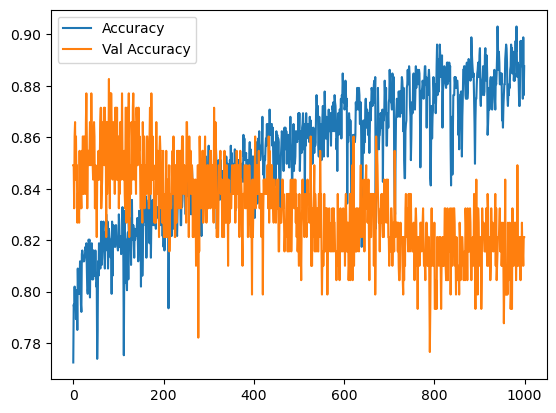

In [154]:
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'],label='Val Accuracy')
plt.legend()

In [153]:
max_accuracy = max(history.history['accuracy'])
print("Highest accuracy value:", max_accuracy)

Highest accuracy value: 0.9030898809432983


In [152]:
max_val_accuracy = max(history.history['val_accuracy'])
print("Highest val_accuracy value:", max_val_accuracy)

Highest val_accuracy value: 0.8826815485954285
